<a href="https://colab.research.google.com/github/Samrat-Doi/Samrat-Doi/blob/main/Fifa_Player_Overall__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, multilabel_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from eli5.sklearn import PermutationImportance
import eli5

In [5]:
df = pd.read_csv('/content/data.csv')

In [6]:
df.shape

(18207, 89)

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
pd.options.display.max_columns = None
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

In [9]:
df = df.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Loaned From'], axis=1)

In [10]:
df.tail()

Name  Age Nationality  Overall  Potential  \
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                   Club Value Wage  Special Preferred Foot  \
18202   Crewe Alexandra  €60K  €1K     1307          Right   
18203    Trelleborgs FF  €60K  €1K     1098          Right   
18204  Cambridge United  €60K  €1K     1189          Right   
18205   Tranmere Rovers  €60K  €1K     1228          Right   
18206   Tranmere Rovers  €60K  €1K     1321          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
18202                       1.0        2.0          2.0  Medium/ Medium   
18203                       1.0        2.0          2.0  Medium/ Medium   
18204                       1.0        3.0          2.0  Medium/ Medium   
18205                       1.0        3.0          2.0  Medium/ Medium   
18206                       1.0        3.0          2.0  Medium/ Medium   

      Body Type Real Face Position  Jersey Number        Joined  \
18202      Lean        No       CM           22.0   May 3, 2017   
18203    Normal        No       ST           21.0  Mar 19, 2018   
18204    Normal        No       ST           33.0   Jul 1, 2017   
18205      Lean        No       RW           34.0  Apr 24, 2018   
18206      Lean        No       CM           33.0  Oct 30, 2018   

      Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
18202                 2019    5'9  134lbs  42+2  42+2  42+2  44+2  44+2  44+2   
18203                 2020    6'3  170lbs  45+2  45+2  45+2  39+2  42+2  42+2   
18204                 2021    5'8  148lbs  45+2  45+2  45+2  45+2  46+2  46+2   
18205                 2019   5'10  154lbs  47+2  47+2  47+2  47+2  46+2  46+2   
18206                 2019   5'10  176lbs  43+2  43+2  43+2  45+2  44+2  44+2   

         RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
18202  44+2  44+2  45+2  45+2  45+2  44+2  45+2  45+2  45+2  44+2  44+2  45+2   
18203  42+2  39+2  40+2  40+2  40+2  38+2  35+2  35+2  35+2  38+2  30+2  31+2   
18204  46+2  45+2  44+2  44+2  44+2  44+2  38+2  38+2  38+2  44+2  34+2  30+2   
18205  46+2  47+2  45+2  45+2  45+2  46+2  39+2  39+2  39+2  46+2  36+2  32+2   
18206  44+2  45+2  45+2  45+2  45+2  46+2  45+2  45+2  45+2  46+2  46+2  46+2   

        CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
18202  45+2  45+2  44+2  45+2  45+2  45+2  45+2  45+2      34.0       38.0   
18203  31+2  31+2  30+2  29+2  32+2  32+2  32+2  29+2      23.0       52.0   
18204  30+2  30+2  34+2  33+2  28+2  28+2  28+2  33+2      25.0       40.0   
18205  32+2  32+2  36+2  35+2  31+2  31+2  31+2  35+2      44.0       50.0   
18206  46+2  46+2  46+2  46+2  47+2  47+2  47+2  46+2      41.0       34.0   

       HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
18202             40.0          49.0     25.0       42.0   30.0        34.0   
18203             52.0          43.0     36.0       39.0   32.0        20.0   
18204             46.0          38.0     38.0       45.0   38.0        27.0   
18205             39.0          42.0     40.0       51.0   34.0        32.0   
18206             46.0          48.0     30.0       43.0   40.0        34.0   

       LongPassing  BallControl  Acceleration  SprintSpeed  Agility  \
18202         45.0         43.0          54.0         57.0     60.0   
18203         25.0         40.0          41.0         39.0     38.0   
18204         28.0         44.0          70.0         69.0     50.0   
18205         32.0         52.0          61.0         60.0     52.0   
18206         44.0         51.0          57.0         55.0     55.0   

       Reactions  Balance  ShotPower  Jumping  Stami

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [12]:
pd.options.display.max_rows = None
df.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Real Face                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM       

In [13]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
  print('They are same.')
else:
  print('They are different.')

They are same.


In [14]:
df.drop(df.index[missing_height], inplace =True)

In [15]:
df.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                      0
Position                      12
Jersey Number                 12
Joined                      1505
Contract Valid Until         241
Height                         0
Weight                         0
LS                          2037
ST                          2037
RS                          2037
LW                          2037
LF                          2037
CF                          2037
RF                          2037
RW                          2037
LAM       

In [16]:
df.drop(['Release Clause', 'Joined'], axis =1, inplace = True)

# Data Analysis

In [17]:
print('Number of countries: {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('___'*30)
print('\n European Countries with most players.')

Number of countries: 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
__________________________________________________________________________________________

 European Countries with most players.


In [18]:
print('Number of clubs: {0}'.format(df['Club'].nunique()))
print('Clubs with highest players: ')
print(df['Club'].value_counts().head(5))

Number of clubs: 651
Clubs with highest players: 
Burnley             33
Arsenal             33
AS Monaco           33
Newcastle United    33
Real Madrid         33
Name: Club, dtype: int64


In [19]:
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][0]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][0]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [20]:
columns = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
           'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
           'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
           'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
           'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
           'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
           'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

print('Best in different aspects: ')
print(' \n')

i = 0
while i< len(columns):
  print('Best {0} : {1}'.format(columns[i],df.loc[df[columns[i]].idxmax()][0]))
  i +=1

Best in different aspects: 
 

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


# Exploratory Data Analysis

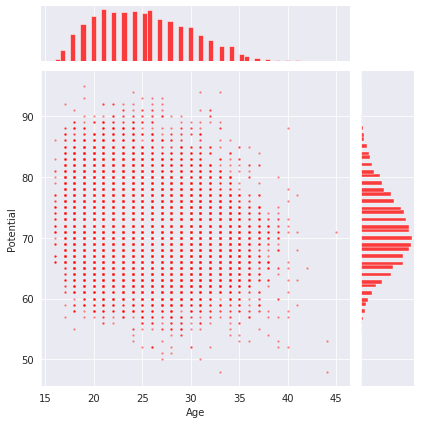

In [21]:
sns.set_style('darkgrid')
sns.jointplot(y = df['Potential'], x =df['Age'], 
              joint_kws = {'alpha' : 0.5, 's': 5 ,'color': 'red'},
              marginal_kws = {'color' : 'red'})
plt.show()

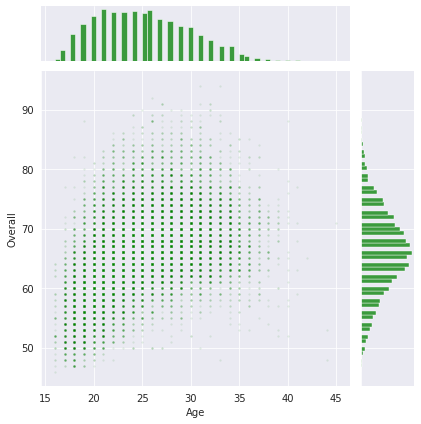

In [22]:
sns.jointplot(y = df['Overall'], x = df['Age'],
              joint_kws = {'alpha': 0.1, 's':5, 'color': 'green'},
              marginal_kws = {'color': 'green'})
plt.show()

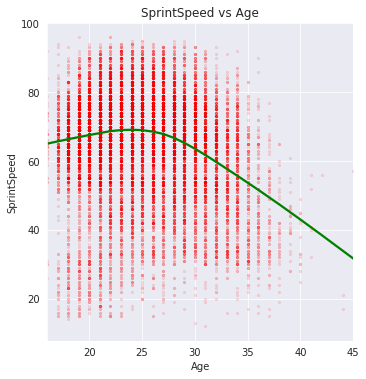

In [23]:
sns.lmplot(data =df, x = 'Age', y = 'SprintSpeed', lowess= True, scatter_kws = {'alpha': 0.1, 's': 5, 'color': 'red'},
           line_kws ={'color': 'green'})
plt.title('SprintSpeed vs Age')
plt.show()

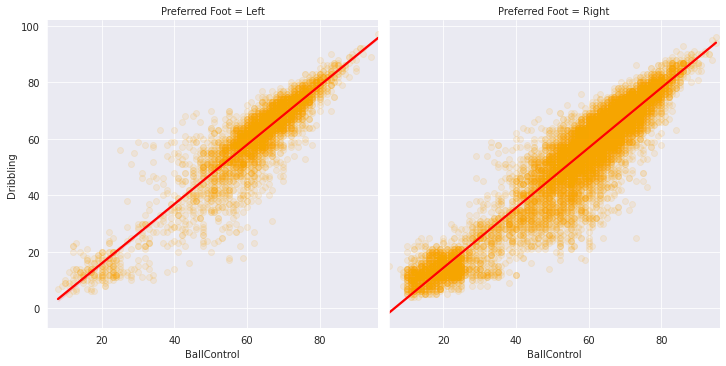

In [24]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})
plt.show()

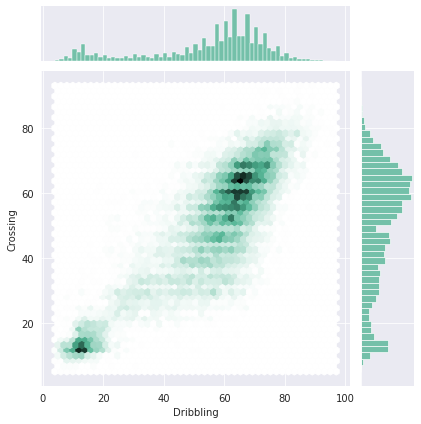

In [25]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391")
plt.show()

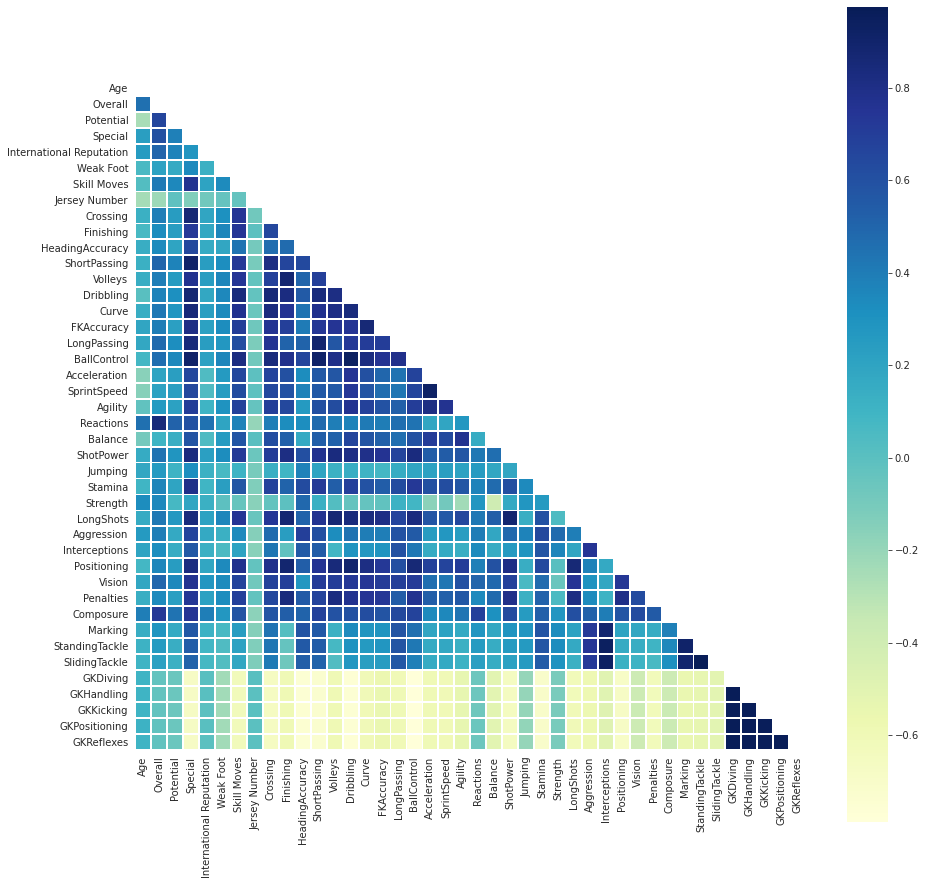

In [26]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

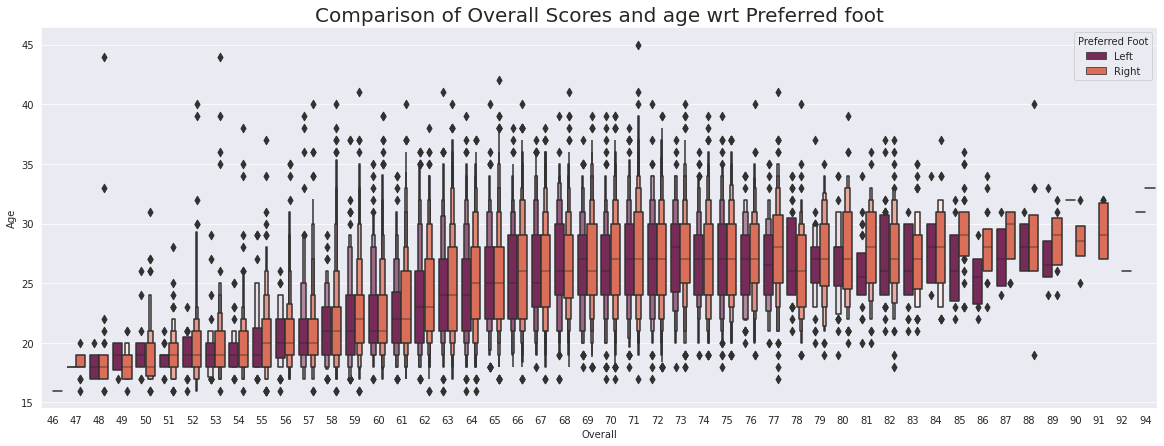

In [27]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

In [28]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

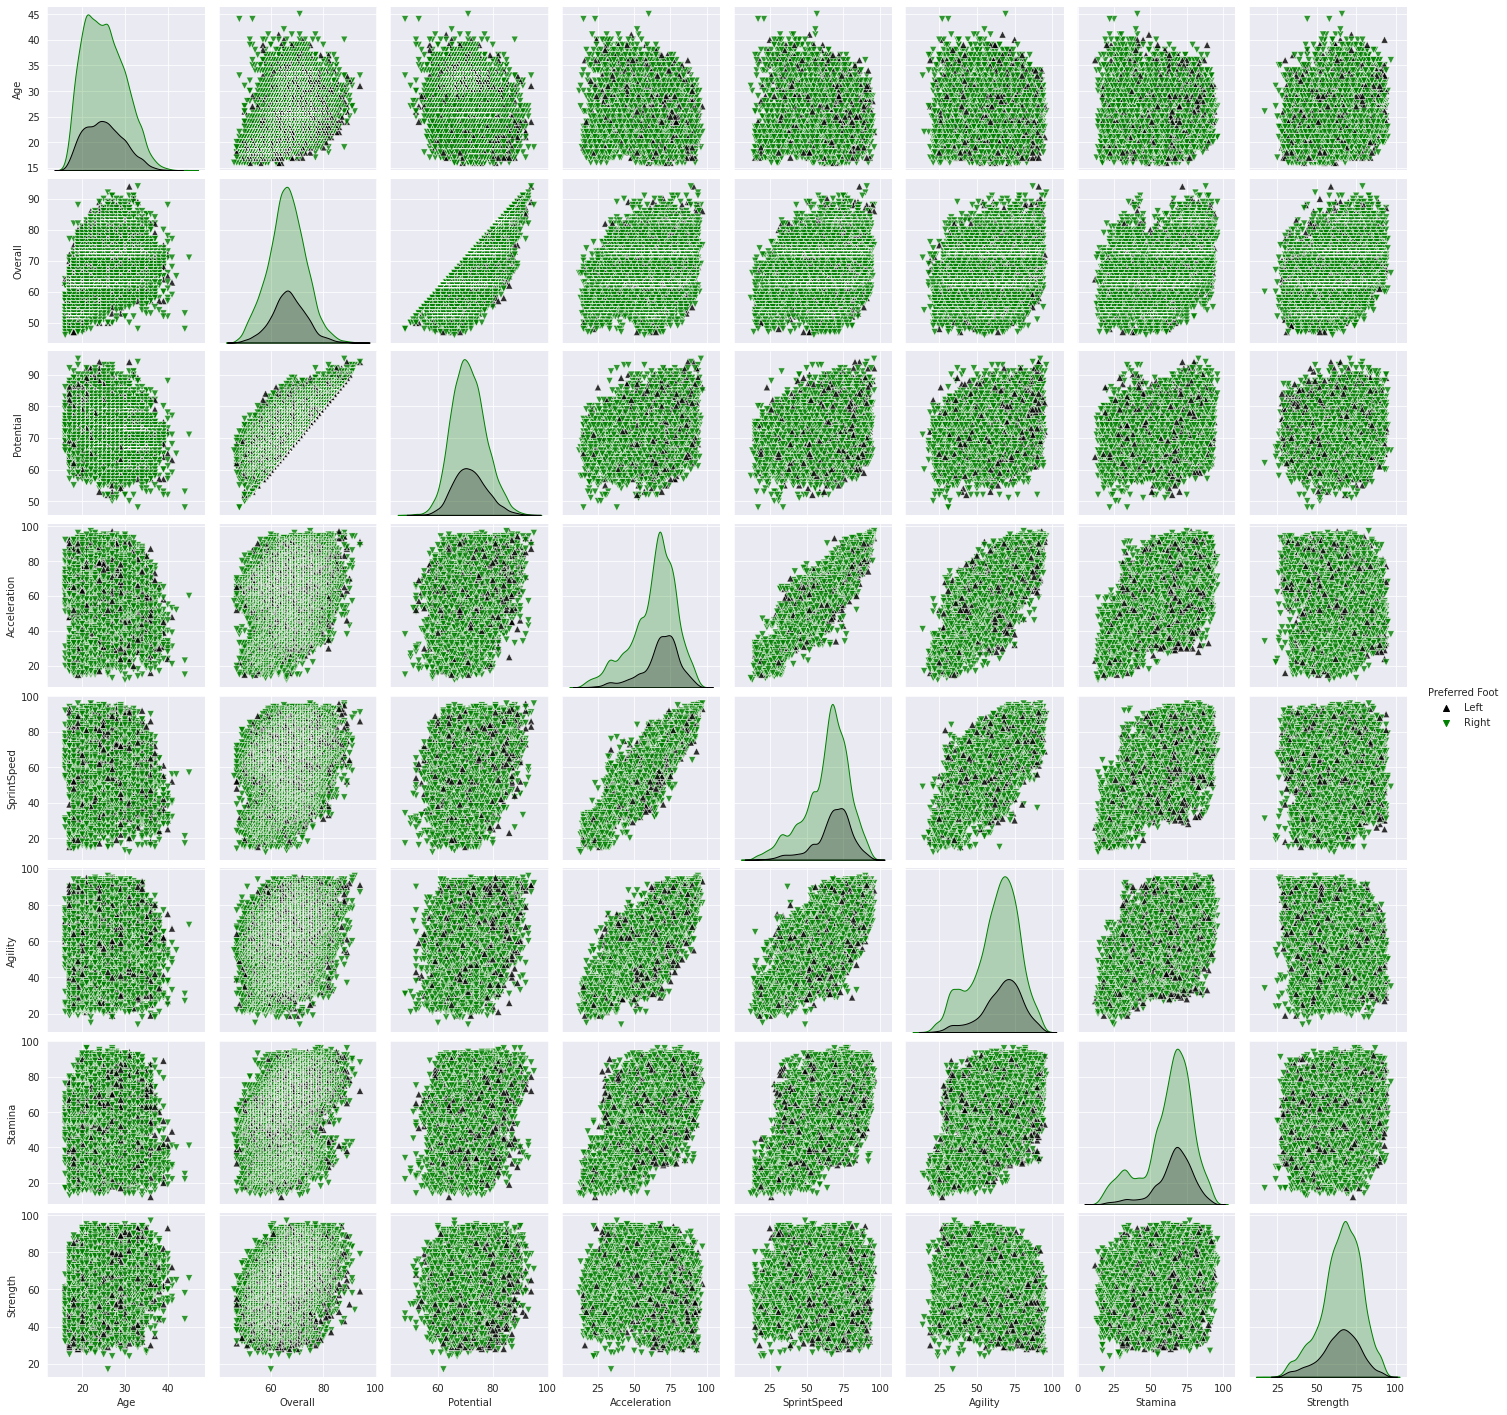

In [29]:
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "green"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])
plt.show()

# Preprocessing Data

In [30]:
data = pd.read_csv('/content/data.csv')

In [31]:
drop_cols = data.columns[28:54]
data = data.drop(drop_cols, axis =1)
data = data.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
                  'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
data = data.dropna()
data.head()

Age Nationality  Overall  Potential Preferred Foot  \
0   31   Argentina       94         94           Left   
1   33    Portugal       94         94          Right   
2   26      Brazil       92         93          Right   
3   27       Spain       91         93          Right   
4   27     Belgium       91         92          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate Real Face  \
0                       5.0        4.0          4.0  Medium/ Medium       Yes   
1                       5.0        4.0          5.0       High/ Low       Yes   
2                       5.0        5.0          5.0    High/ Medium       Yes   
3                       4.0        3.0          1.0  Medium/ Medium       Yes   
4                       4.0        5.0          4.0      High/ High       Yes   

  Position  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0       RF      84.0       95.0             70.0          90.0     86.0   
1       ST      84.0       94.0             89.0          81.0     87.0   
2       LW      79.0       87.0             62.0          84.0     84.0   
3       GK      17.0       13.0             21.0          50.0     13.0   
4      RCM      93.0       82.0             55.0          92.0     82.0   

   Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  \
0       97.0   93.0        94.0         87.0         96.0          91.0   
1       88.0   81.0        76.0         77.0         94.0          89.0   
2       96.0   88.0        87.0         78.0         95.0          94.0   
3       18.0   21.0        19.0         51.0         42.0          57.0   
4       86.0   85.0        83.0         91.0         91.0          78.0   

   SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  \
0         86.0     91.0       95.0     95.0       85.0     68.0     72.0   
1         91.0     87.0       96.0     70.0       95.0     95.0     88.0   
2         90.0     96.0       94.0     84.0       80.0     61.0     81.0   
3         58.0     60.0       90.0     43.0       31.0     67.0     43.0   
4         76.0     79.0       91.0     77.0       91.0     63.0     90.0   

   Strength  LongShots  Aggression  Interceptions  Positioning  Vision  \
0      59.0       94.0        48.0           22.0         94.0    94.0   
1      79.0       93.0        63.0           29.0         95.0    82.0   
2      49.0       82.0        56.0           36.0         89.0    87.0   
3      64.0       12.0        38.0           30.0         12.0    68.0   
4      75.0       91.0        76.0           61.0         87.0    94.0   

   Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
0       75.0       96.0     33.0            28.0           26.0       6.0   
1       85.0       95.0     28.0            31.0           23.0       7.0   
2       81.0       94.0     27.0            24.0           33.0       9.0   
3       40.0       68.0     15.0            21.0           13.0      90.0   
4       79.0       88.0     68.0            58.0           51.0      15.0   

   GKHandling  GKKicking  GKPositioning  GKReflexes  
0        11.0       15.0           14.0         8.0  
1        11.0       15.0           14.0        11.0  
2         9.0       15.0           15.0        11.0  
3        85.0       87.0           88.0        94.0  
4        13.0        5.0           10.0        13.0

In [34]:
def face_to_num(data):
  if (data['Real Face'] == 'Yes'):
    return 1
  else: 
    return 0


def right_footed(data):
  if (data['Preferred Foot']== 'Right'):
    return 1
  else: 
    return 0


def simple_position(data):
  if (data['Position']== 'GK'):
    return 'GK'
  elif ((data['Position']== 'RB') | (data['Position'] == 'LB') | (data['Position'] == 'CB') | (data['Position'] == 'LCB') | (data['Position'] == 'RCB') | (data['Position'] == 'RWB') | (data['Position'] == 'LWB')) :
    return 'DF'
  elif ((data['Position']== 'LDM') | (data['Position'] == 'CDM') | (data['Position'] == 'RDM')):
    return 'DM'
  elif ((data['Position']== 'LM') | (data['Position'] == 'LCM') | (data['Position'] == 'CM') | (data['Position'] == 'RCM') | (data['Position'] == 'RM')) :
    return 'MF'
  elif ((data['Position']== 'LAM') | (data['Position'] == 'CAM') | (data['Position'] == 'RAM') | (data['Position'] == 'LW') | (data['Position'] == 'RW')) :
    return 'AM'
  elif ((data['Position']== 'RS') | (data['Position'] == 'ST') | (data['Position'] == 'LS') | (data['Position'] == 'CF') | (data['Position'] == 'LF') | (data['Position'] == 'RF')) :
    return 'ST'
  else:
    return data.Position

nat_counts = data['Nationality'].value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

def major_nation(data):
  if (data.Nationality in nat_list):
     return 1
  else:
    return 0

data1 = data.copy()

data1['Real_Face'] = data1.apply(face_to_num, axis = 1)
data1['Right_Foot'] = data1.apply(right_footed, axis = 1)
data1['Simple_Position'] = data1.apply(simple_position, axis = 1)
data1['Major_Nation'] = data1.apply(major_nation, axis = 1)


tempwork = data1['Work Rate'].str.split("/ ", n =1, expand = True)

data1['WorkRate1'] = tempwork[0]
data1['WorkRate2'] = tempwork[1]

data1 = data1.drop(['Work Rate', 'Preferred Foot','Real Face', 'Position', 'Nationality' ], axis = 1)
 

In [35]:
data1.head()

Age  Overall  Potential  International Reputation  Weak Foot  Skill Moves  \
0   31       94         94                       5.0        4.0          4.0   
1   33       94         94                       5.0        4.0          5.0   
2   26       92         93                       5.0        5.0          5.0   
3   27       91         93                       4.0        3.0          1.0   
4   27       91         92                       4.0        5.0          4.0   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   93.0        94.0         87.0         96.0          91.0         86.0   
1   81.0        76.0         77.0         94.0          89.0         91.0   
2   88.0        87.0         78.0         95.0          94.0         90.0   
3   21.0        19.0         51.0         42.0          57.0         58.0   
4   85.0        83.0         91.0         91.0          78.0         76.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     91.0       95.0     95.0       85.0     68.0     72.0      59.0   
1     87.0       96.0     70.0       95.0     95.0     88.0      79.0   
2     96.0       94.0     84.0       80.0     61.0     81.0      49.0   
3     60.0       90.0     43.0       31.0     67.0     43.0      64.0   
4     79.0       91.0     77.0       91.0     63.0     90.0      75.0   

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0       94.0        48.0           22.0         94.0    94.0       75.0   
1       93.0        63.0           29.0         95.0    82.0       85.0   
2       82.0        56.0           36.0         89.0    87.0       81.0   
3       12.0        38.0           30.0         12.0    68.0       40.0   
4       91.0        76.0           61.0         87.0    94.0       79.0   

   Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0       96.0     33.0            28.0           26.0       6.0        11.0   
1       95.0     28.0            31.0           23.0       7.0        11.0   
2       94.0     27.0            24.0           33.0       9.0         9.0   
3       68.0     15.0            21.0           13.0      90.0        85.0   
4       88.0     68.0            58.0           51.0      15.0        13.0   

   GKKicking  GKPositioning  GKReflexes  Real_Face  Right_Foot  \
0       15.0           14.0         8.0          1           0   
1       15.0           14.0        11.0          1           1   
2       15.0           15.0        11.0          1           1   
3       87.0           88.0        94.0          1           1   
4        5.0           10.0        13.0          1           1   

  Simple_Position  Major_Nation WorkRate1 WorkRate2  
0              ST             1    Medium    Medium  
1              ST             1      High       Low  
2              AM             1      High    Medium  
3              GK             1    Medium    Medium  
4              MF             1      High      High

In [36]:
target = data1.Overall
data2 = data1.drop(['Overall'], axis = 1)
data2 = pd.get_dummies(data2)

x_train, x_test, y_train, y_test = train_test_split(data2, target, test_size = 0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(14517, 54) (3630, 54)
(14517,) (3630,)


In [43]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
predict1 = model1.predict(x_test)

print('r2 score: ' + str (r2_score(y_test, predict1)))
print('RMSE: ' + str (np.sqrt(mean_squared_error(y_test, predict1))))

r2 score: 0.9303287594836919
RMSE: 1.8471193819125689


In [44]:
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)
predict2 = model2.predict(x_test)

print('r2 score: ' + str (r2_score(y_test, predict2)))
print('RMSE: ' + str (np.sqrt(mean_squared_error(y_test, predict2))))

r2 score: 0.9751110018560579
RMSE: 1.1040071889613023


In [53]:
perm = PermutationImportance(model1, random_state =1).fit(x_test, y_test)
eli5.show_weights(perm , feature_names = x_test.columns.tolist())

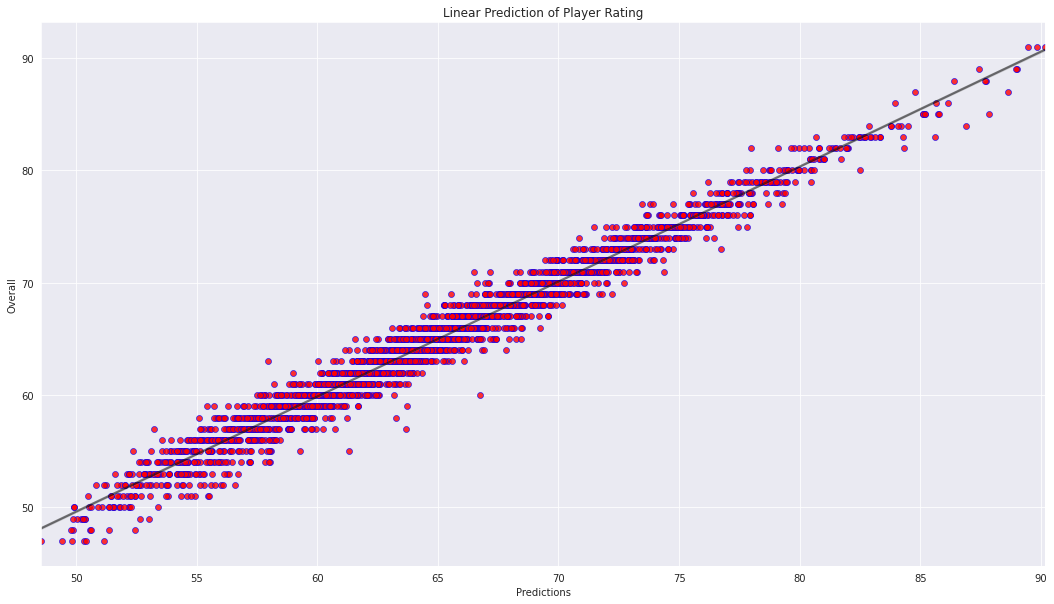

In [55]:
plt.figure(figsize =(18,10))
sns.regplot(predict2, y_test, scatter_kws ={'color': 'red', 'edgecolor':'blue', 'linewidth' : 0.7},
            line_kws ={'color': 'black', 'alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title('Linear Prediction of Player Rating')
plt.show()